In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

sns.set_style()

In [5]:
data = pd.read_csv('C:/Users/hp/Desktop/mini-project/aarogyam/cirrhosis.csv')
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
data['Drug'].fillna('D-penicillamine', inplace=True)
data['Ascites'].fillna('N', inplace=True)
data['Hepatomegaly'].fillna('Y', inplace=True)
data['Spiders'].fillna('N', inplace=True)
data['Stage'].fillna(3.0, inplace=True)

# Missing Values Filled Using Median Values
data['Cholesterol'].fillna(309.5, inplace=True)
data['Copper'].fillna(73, inplace=True)
data['Alk_Phos'].fillna(1259, inplace=True)
data['SGOT'].fillna(114.7, inplace=True)
data['Tryglicerides'].fillna(108, inplace=True)
data['Platelets'].fillna(251, inplace=True)
data['Prothrombin'].fillna(10.60, inplace=True)
# Age is in days so I'll just convert it in years.
data['Age'] = data['Age']/365

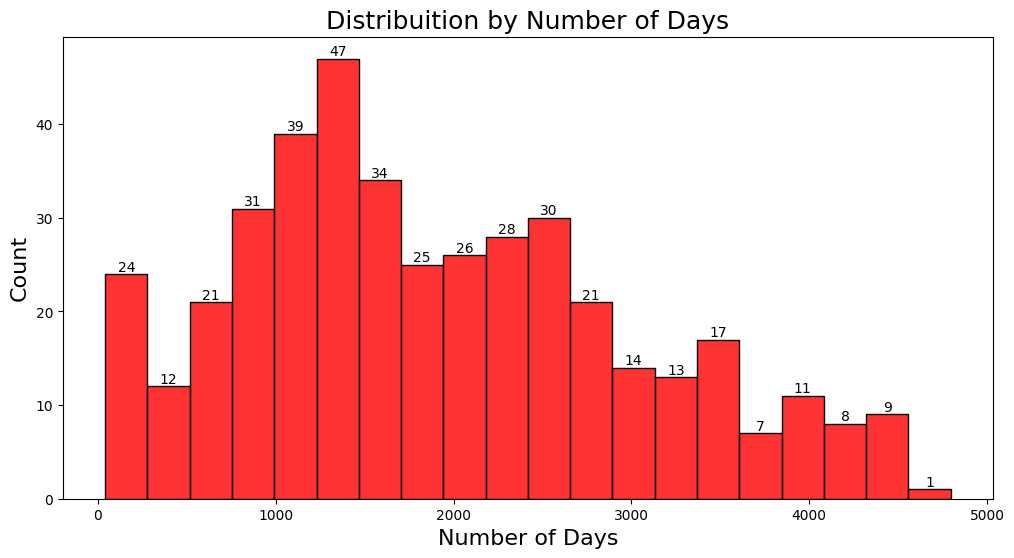

In [8]:
df = data.copy()
plt.figure(figsize=(12,6))
plt.title('Distribuition by Number of Days', fontsize=18)
ax = sns.histplot(data['N_Days'], bins=20, color='red', alpha=0.8)
plt.xlabel('Number of Days', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)


In [9]:
data['Status'].replace({'C':0, 'CL':1, 'D':2}, inplace=True)
data['Drug'].replace({'D-penicillamine':0, 'Placebo':1}, inplace=True)
data['Sex'].replace({'F':0, 'M':1}, inplace=True)
data['Ascites'].replace({'N':0, 'Y':1}, inplace=True)
data['Hepatomegaly'].replace({'N':0, 'Y':1}, inplace=True)
data['Spiders'].replace({'N':0, 'Y':1}, inplace=True)
data['Edema'].replace({'N':0, 'S':1, 'Y':2}, inplace=True)